In [19]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.applications.xception import Xception
from pickle import load

In [23]:
def extract_features(filename , model):
    try:
        image = Image.open(filename)

    except:
        print("Error : Couldn't open image")
  
    image = image.resize((299,299))
    image = np.array(image)

    if image.shape[2] == 4:
        image = image[... , :3]
    image = np.expand_dims(image , axis=0)
    image = image/127.5
    image = image - 1.0
    feature = model.predict(image)
    return feature

def word_for_id(integer , tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

def generate_desc(model , tokenizer , photo , max_length):
    in_text = '<start>'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence] , maxlen = max_length)
        pred = model.predict([photo , sequence] , verbose = 0)
        pred = np.argmax(pred)
        word = word_for_id(pred , tokenizer)
        if word is None:
            break
        in_text += ' ' + word
        if word == 'end':
            break
    return in_text





<start> man in yellow kayak paddles through the water end


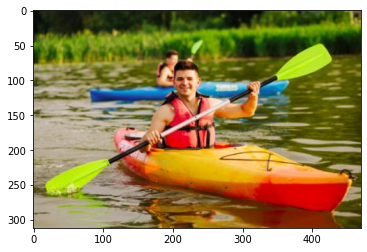

In [30]:
max_length = 32
img_path = "test_image/test_im_4.jpg"
tokenizer = load(open("tokenizer.p" , "rb"))
model = load_model('models/model_10.h5')
xception_model = Xception(include_top = False , pooling = 'avg')

photo = extract_features(img_path , xception_model)
img = Image.open(img_path)

description = generate_desc(model , tokenizer , photo , max_length)
print("\n\n")
print(description)
plt.imshow(img)